In [1]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

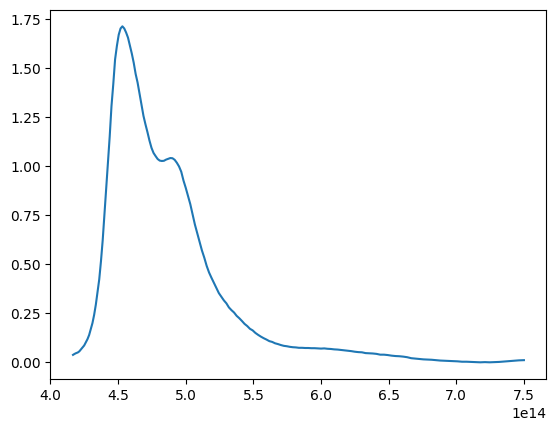

In [35]:
c = 3e8 # 1
frequency = c / np.arange(400, 722, 2) * 1e9
absorbance = np.loadtxt('C:/Users/julia/Desktop/Proyectos/labo67/Mediciones/04-06/400-720 nm, 2 nm.txt', skiprows=1)
plt.plot(frequency, absorbance)

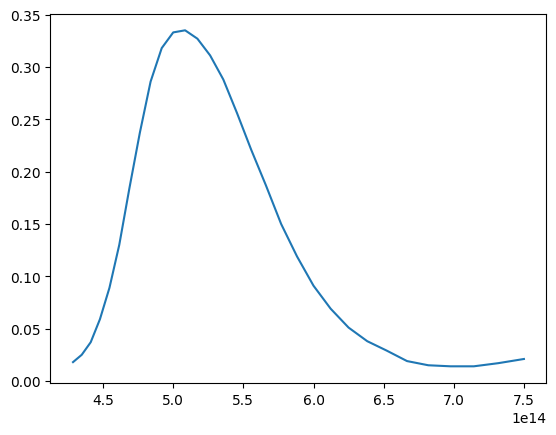

In [32]:
wavelength, absorbance = np.loadtxt('C:/Users/julia/Desktop/Proyectos/labo67/Mediciones/07-05/espectroAbsorbancia.txt', skiprows=1).T
frequency = c/wavelength * 1e9
plt.plot(frequency, absorbance)

In [38]:
def map(f):
    f_min = 100
    f_max = 1000
    return f_min + (f_max - f_min) / (7.5e14 - 4e14) * (f- 4e14)#f * 250000 

t = np.linspace(0, 10, 10*44100)
waveform = 0
for f, A in zip(map(frequency), absorbance):
    waveform += A * np.sin(2*np.pi*f*t)
waveform = waveform / np.max(waveform)
#plt.plot(t, waveform)

In [39]:
def play_waveform(waveform, sample_rate=44100):
    return Audio(waveform, rate=sample_rate)

play_waveform(waveform)

In [15]:
def save_waveform(waveform, file, sample_rate=44100):
    tot = waveform.astype(np.float32)
    wavfile.write(f'{file}.wav', sample_rate, tot)

save_waveform(waveform, 'azuldemetileno')